# ConvNN TestingTheDefinedArchitectures CIFAR-10dataset

It is recommended to run this notebook on Colab.

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

Let's test the defined NNs on the CIFAR-10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

## DATASET

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [5]:
y_train = y_train.reshape((50000,))
y_test = y_test.reshape((10000,))
y_train.shape

(50000,)

Class:  frog


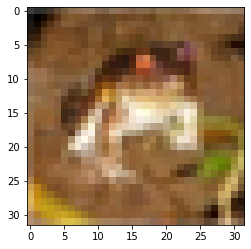

In [ ]:
image = x_train[0]
plt.imshow(image)

print('Class: ', CLASS_NAMES[y_train[0]])

Class:  truck


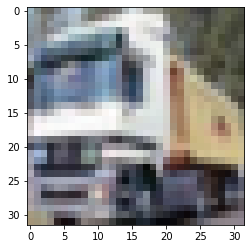

In [ ]:
image = x_train[1]
plt.imshow(image)

print('Class: ', CLASS_NAMES[y_train[1]])

## PREPROCESSING

### Normalization

In [6]:
x_train = x_train/255

x_test = x_test/255

### Changing the spatial dimensions into $74,74$

In [7]:
x_train = tf.image.resize(x_train, (74,74))
x_test = tf.image.resize(x_test, (74,74))

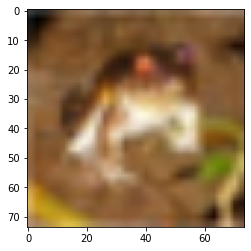

In [ ]:
image = x_train[0]
plt.imshow(image)

## ALEXNET

In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
### INPUT
xin = Input(shape=(74,74,3))


### CONV PART
x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(xin)
x = BatchNormalization()(x) 
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 

x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 

x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)


### FLATTENING
x = keras.layers.Flatten()(x)


### DENSE PART
x = Dense(units=4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(units=4096, activation='relu')(x)
x = Dropout(0.5)(x)

xout = Dense(units=10)(x)  # NO ACTIVATION FUNCTION, BECAUSE WE USE sparse_categorical_crossentropy WITH from_logits=True


### MODEL
alexnet = Model(inputs=xin, outputs=xout)

In [ ]:
alexnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 74, 74, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024  

In [ ]:
###
#alexnet.load_weights('alexnet.h5')

In [ ]:
from tensorflow.keras.optimizers import Adam

alexnet.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=3, restore_best_weights=True)

In [ ]:
history = alexnet.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[callback])

Epoch 1/20
1250/1250 [==============================] - 24s 16ms/step - loss: 1.9089 - accuracy: 0.3091 - val_loss: 1.9844 - val_accuracy: 0.3153
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5824 - accuracy: 0.4394 - val_loss: 1.5764 - val_accuracy: 0.4392
Epoch 3/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.4178 - accuracy: 0.5095 - val_loss: 1.3667 - val_accuracy: 0.5165
Epoch 4/20
1250/1250 [==============================] - 19s 16ms/step - loss: 1.2894 - accuracy: 0.5588 - val_loss: 1.3492 - val_accuracy: 0.5438
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1789 - accuracy: 0.5953 - val_loss: 1.1507 - val_accuracy: 0.6088
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0645 - accuracy: 0.6381 - val_loss: 1.1628 - val_accuracy: 0.6142
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9809 - accuracy: 0.6701 - val_loss: 1.1439 -

In [ ]:
alexnet.save_weights('alexnet.h5')

In [9]:
def plot_history(training_history, n_epochs):
    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

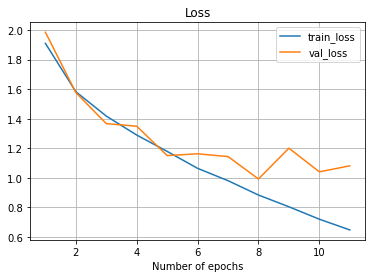

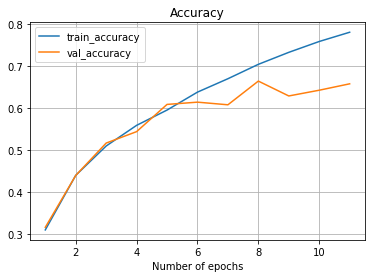

In [ ]:
plot_history(history, n_epochs=11)

**Overfitting...**

In [ ]:
alexnet.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9931 - accuracy: 0.6668


[0.9931128025054932, 0.6668000221252441]

True class:  cat
Predictes class:  cat


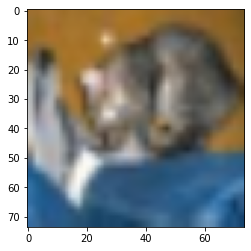

In [ ]:
import numpy as np

image = x_test[0]
plt.imshow(image)
print('True class: ', CLASS_NAMES[y_test[0]])
pred_class_index = np.argmax(alexnet.predict(np.expand_dims(x_test[0], 0)))
pred_class = CLASS_NAMES[pred_class_index]
print('Predictes class: ', pred_class)

## VGG16

No original NN. Some modifications are made, in order to make it suitable for our specific problem.

In [15]:
### INPUT
xin = Input(shape=(74,74,3))


### CONV PART
x = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(xin)
"""x = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)"""
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
"""x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)"""
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)         

x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
"""x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)"""
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
"""x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)"""
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
"""x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)"""
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 



### FLATTENING
x = Flatten()(x)


### DENSE PART
"""FOR REDUCING THE COMPLEXITY OF THE NETWORK: 4096->2048"""
x = Dense(units=2048,activation="relu")(x)  
x = Dense(units=2048,activation="relu")(x)

xout = Dense(units=10)(x)  # NO ACTIVATION FUNCTION, BECAUSE WE USE sparse_categorical_crossentropy WITH from_logits=True


### MODEL
vgg16 = Model(inputs=xin, outputs=xout)

In [16]:
vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 74, 74, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 18, 18, 256)       2951

In [17]:
from tensorflow.keras.optimizers import Adam

vgg16.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=3, restore_best_weights=True)

In [19]:
history = vgg16.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[callback])

Epoch 1/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.3061 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1025
Epoch 2/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.0952
Epoch 3/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/20
1249/1250 [============================>.] - ETA: 0s - loss: 2.3028 - accuracy: 0.0979

KeyboardInterrupt: ignored

**It does not learn...**

In [ ]:
vgg16.save_weights('vgg16.h5')

In [ ]:
plot_history(history, n_epochs=11)

In [ ]:
vgg16.evaluate(x_test, y_test)

In [ ]:
import numpy as np

image = x_test[0]
plt.imshow(image)
print('True class: ', CLASS_NAMES[y_test[0]])
pred_class_index = np.argmax(vgg16.predict(np.expand_dims(x_test[0], 0)))
pred_class = CLASS_NAMES[pred_class_index]
print('Predictes class: ', pred_class)

## INCEPTION V1

No original NN. Some modifications are made, in order to make it suitable for our specific problem.

In [13]:
from tensorflow.keras.layers import concatenate

def inception_module(xin, c1, c2_int, c2, c3_int, c3, c4):
    """
    Arguments
    ---------
    xin: Tensor
        Input of the module
    c1: int
        Number of output channels of the tower 1
    c2_int: int
        Number of output channels of the first convolution in the tower 2 
        (Intermediate number of channels of the tower 2)
    c2: int
        Number of output channels of the tower 2
    c3: int
        Number of output channels of the tower 3
    c3_int: int
        Number of output channels of the first convolution in the tower 3 
        (Intermediate number of channels of the tower 3)
    c4: int
        Number of output channels of the tower 4
    """
    
    # Tower 1
    tower1 = Conv2D(filters=c1, kernel_size=(1,1), padding='same', activation='relu')(xin)
    
    # Tower 2
    tower2 = Conv2D(filters=c2_int, kernel_size=(1,1), padding='same', activation='relu')(xin)
    tower2 = Conv2D(filters=c2, kernel_size=(3,3), padding='same', activation='relu')(tower2)
    
    # Tower 3
    tower3 = Conv2D(filters=c3_int, kernel_size=(1,1), padding='same', activation='relu')(xin)
    tower3 = Conv2D(filters=c3, kernel_size=(5,5), padding='same', activation='relu')(tower3)
    
    # Tower 4
    tower4 = MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same')(xin)
    tower4 = Conv2D(c4, (1,1), padding='same', activation='relu')(tower4)
    
    out = concatenate([tower1, tower2, tower3, tower4], axis=-1)
    return out

In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [24]:
### INPUT
xin = Input(shape=(74,74,3))


### CONV PART
x = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same')(xin)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same')(xin)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = inception_module(x, c1=64, c2_int=96, c2=128, c3_int=16, c3=32, c4=32)

x = inception_module(x, c1=128, c2_int=128, c2=192, c3_int=32, c3=96, c4=64)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = inception_module(x, c1=192, c2_int=96, c2=208, c3_int=16, c3=48, c4=64)      

"""
Reducing the model complexity
x = inception_module(x, c1=160, c2_int=112, c2=224, c3_int=24, c3=64, c4=64)  

x = inception_module(x, c1=128, c2_int=128, c2=256, c3_int=24, c3=64, c4=64)  

x = inception_module(x, c1=112, c2_int=144, c2=288, c3_int=32, c3=64, c4=64)"""       

x = inception_module(x, c1=256, c2_int=160, c2=320, c3_int=32, c3=128, c4=128)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

"""
Reducing the model complexity
x = inception_module(x, c1=256, c2_int=160, c2=320, c3_int=32, c3=128, c4=128) 
x = inception_module(x, c1=384, c2_int=192, c2=384, c3_int=48, c3=128, c4=128)"""  


### FLATTENING
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)


### DENSE PART
"""Added a Dense layer"""
x = Dense(units=1024)(x)
xout = Dense(units=10)(x)  # NO ACTIVATION FUNCTION, BECAUSE WE USE sparse_categorical_crossentropy WITH from_logits=True


### MODEL
inceptionV1 = Model(inputs=xin, outputs=xout)

In [25]:
inceptionV1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 74, 74, 3)]  0           []                               
                                                                                                  
 conv2d_155 (Conv2D)            (None, 74, 74, 192)  5376        ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_40 (MaxPooling2D  (None, 36, 36, 192)  0          ['conv2d_155[0][0]']             
 )                                                                                                
                                                                                                  
 conv2d_157 (Conv2D)            (None, 36, 36, 96)   18528       ['max_pooling2d_40[0][0]'] 

In [ ]:
###
#inceptionV1.load_weights('alexnet.h5')

In [26]:
from tensorflow.keras.optimizers import Adam

inceptionV1.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=3, restore_best_weights=True)

In [28]:
history = inceptionV1.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[callback])

Epoch 1/20
1250/1250 [==============================] - 109s 86ms/step - loss: 1.8379 - accuracy: 0.2986 - val_loss: 1.4799 - val_accuracy: 0.4439
Epoch 2/20
1250/1250 [==============================] - 107s 85ms/step - loss: 1.4305 - accuracy: 0.4743 - val_loss: 1.2340 - val_accuracy: 0.5481
Epoch 3/20
1250/1250 [==============================] - 107s 85ms/step - loss: 1.2238 - accuracy: 0.5573 - val_loss: 1.0963 - val_accuracy: 0.5968
Epoch 4/20
1250/1250 [==============================] - 106s 85ms/step - loss: 1.0870 - accuracy: 0.6119 - val_loss: 0.9832 - val_accuracy: 0.6472
Epoch 5/20
1250/1250 [==============================] - 108s 86ms/step - loss: 0.9758 - accuracy: 0.6558 - val_loss: 1.0331 - val_accuracy: 0.6318
Epoch 6/20
1250/1250 [==============================] - 108s 86ms/step - loss: 0.8969 - accuracy: 0.6826 - val_loss: 0.7982 - val_accuracy: 0.7210
Epoch 7/20
1250/1250 [==============================] - 108s 86ms/step - loss: 0.8343 - accuracy: 0.7052 - val_loss: 0

In [29]:
inceptionV1.save_weights('inceptionV1.h5')

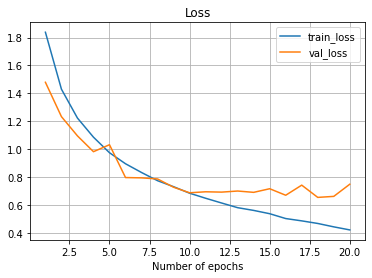

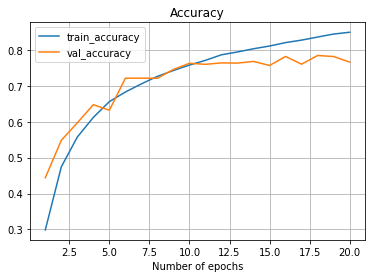

In [32]:
plot_history(history, n_epochs=20)

**Overfitting...**

In [33]:
inceptionV1.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.7779 - accuracy: 0.7599


[0.7779279351234436, 0.7598999738693237]

**Better than AlexNet!**

True class:  cat
Predictes class:  cat


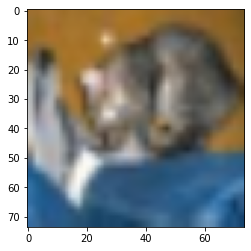

In [34]:
import numpy as np

image = x_test[0]
plt.imshow(image)
print('True class: ', CLASS_NAMES[y_test[0]])
pred_class_index = np.argmax(inceptionV1.predict(np.expand_dims(x_test[0], 0)))
pred_class = CLASS_NAMES[pred_class_index]
print('Predictes class: ', pred_class)

## RESNET

In [ ]:
from tensorflow.keras.layers import ReLU, Add

In [ ]:
def residual_block(x, downsample, filters, kernel_size=3):
    y = Conv2D(filters=filters, kernel_size=kernel_size, strides= (1 if not downsample else 2), padding="same")(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv2D(filters=filters, kernel_size=kernel_size, strides=1, padding="same")(y)

    if downsample:
        x = Conv2D(filters=filters, kernel_size=1, strides=2, padding="same")(x)
        
    out = Add()([x, y])
    out = BatchNormalization()(out)
    out = ReLU()(out)
    
    return out

In [ ]:
xin = Input(shape=(74, 74, 3))
num_filters = 64

x = BatchNormalization()(xin)
x = Conv2D(filters=num_filters, kernel_size=3, strides=1,padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)

num_resBlocks_list = [2, 5, 5, 2]
for i in range(len(num_resBlocks_list)):
    num_resBlocks = num_resBlocks_list[i]
    for j in range(num_resBlocks):
        x = residual_block(x, downsample=(j==0 and i!=0), filters=num_filters)
    num_filters *= 2

x = AveragePooling2D(4)(x)
x = Flatten()(x)
xout = Dense(10)(x)   # NO ACTIVATION FUNCTION, BECAUSE WE USE sparse_categorical_crossentropy WITH from_logits=True

resnet = Model(xin, xout)

In [ ]:
resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 74, 74, 3)]  0           []                               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 74, 74, 3)   12          ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_312 (Conv2D)            (None, 74, 74, 64)   1792        ['batch_normalization_30[0][0]'] 
                                                                                                  
 batch_normalization_31 (BatchN  (None, 74, 74, 64)  256         ['conv2d_312[0][0]']       

In [ ]:
###
#resnet.load_weights('resnet.h5')

In [ ]:
from tensorflow.keras.optimizers import Adam

resnet.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=3, restore_best_weights=True)

In [ ]:
history = resnet.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[callback])

Epoch 1/20
1250/1250 [==============================] - 340s 266ms/step - loss: 1.8887 - accuracy: 0.3056 - val_loss: 2.2485 - val_accuracy: 0.3083
Epoch 2/20
1250/1250 [==============================] - 334s 267ms/step - loss: 1.4626 - accuracy: 0.4688 - val_loss: 2.0329 - val_accuracy: 0.3970
Epoch 3/20
1250/1250 [==============================] - 333s 266ms/step - loss: 1.1362 - accuracy: 0.5964 - val_loss: 1.3482 - val_accuracy: 0.5446
Epoch 4/20
1250/1250 [==============================] - 334s 267ms/step - loss: 0.9298 - accuracy: 0.6722 - val_loss: 1.2650 - val_accuracy: 0.5696
Epoch 5/20
1250/1250 [==============================] - 334s 267ms/step - loss: 0.7720 - accuracy: 0.7294 - val_loss: 0.9679 - val_accuracy: 0.6675
Epoch 6/20
1250/1250 [==============================] - 334s 267ms/step - loss: 0.6553 - accuracy: 0.7728 - val_loss: 0.7249 - val_accuracy: 0.7485
Epoch 7/20
1250/1250 [==============================] - 334s 267ms/step - loss: 0.5517 - accuracy: 0.8083 - val_

In [ ]:
resnet.save_weights('resnet.h5')

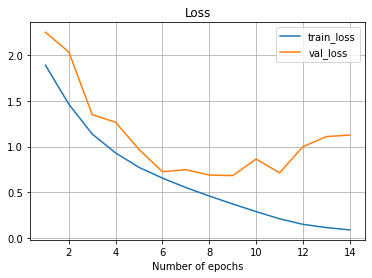

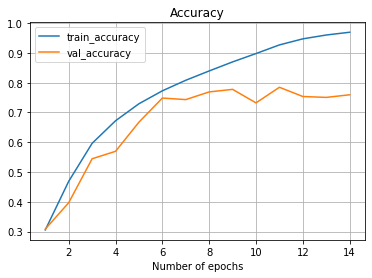

In [ ]:
plot_history(history, n_epochs=14)

**A lot of Overfitting...**

In [ ]:
resnet.evaluate(x_test, y_test)

313/313 [==============================] - 25s 80ms/step - loss: 0.7714 - accuracy: 0.7728


[0.7714086771011353, 0.7728000283241272]

**Better than InceptionV1!**

True class:  cat
Predictes class:  cat


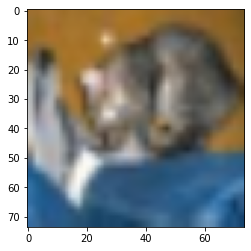

In [ ]:
import numpy as np

image = x_test[0]
plt.imshow(image)
print('True class: ', CLASS_NAMES[y_test[0]])
pred_class_index = np.argmax(resnet.predict(np.expand_dims(x_test[0], 0)))
pred_class = CLASS_NAMES[pred_class_index]
print('Predictes class: ', pred_class)